import pandas as pd
import numpy as np
import random

In [37]:
sections = np.arange(0,100,1)
sections = np.repeat(sections, 211)
sections

array([ 0,  0,  0, ..., 99, 99, 99])

In [38]:
plots = np.arange(0,211,1)
plots = list(plots)
plots = plots*100
plots = np.array(plots)
plots

array([  0,   1,   2, ..., 208, 209, 210])

In [39]:
len(sections) == len(plots)

True

In [40]:
mw_present = np.random.normal(10, 6.5, int(len(sections)*.2))
mw_present = mw_present.clip(min=0)
mw_present = mw_present.astype('int')

In [41]:
mw_present = list(mw_present)
mw_present.extend([0]*int(len(sections)*.8))
random.shuffle(mw_present)
sum(mw_present)

41045

In [42]:
len(mw_present)

21100

In [43]:
df = pd.DataFrame({'section': sections, 'plot': plots, 'mw': mw_present})
df.to_csv('population.csv')

In [44]:
df['mw'].mean()

1.945260663507109

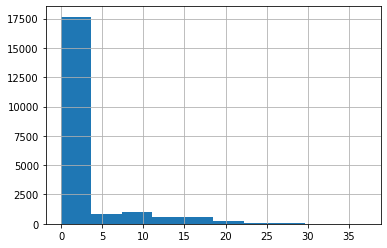

In [45]:
df['mw'].hist()

In [46]:
srs = df.sample(60)
srs

,section,plot,mw
20699,98,21,0
16537,78,79,0
8705,41,54,0
14241,67,104,3
15513,73,110,0
3413,16,37,0
11840,56,24,13
9097,43,24,0
16396,77,149,0
18470,87,113,0


In [47]:
srs['mw'].mean()

0.4666666666666667

In [48]:
srs['mw'].mean() * len(df)

9846.666666666666

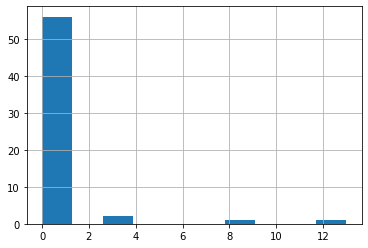

In [49]:
srs['mw'].hist()

In [50]:
clusters = np.random.choice(np.arange(0,100,1), 10)
clusters

array([82, 46, 52, 99, 59, 61, 41,  1, 91, 43])

In [65]:
cluster_sample = []
for cluster in clusters:
    filt = df['section'] == cluster
    sample = df.loc[filt].sample(6)
    cluster_sample.append(sample)
cluster_sample = pd.concat(cluster_sample)
cluster_sample.to_csv('clusters.csv')

In [66]:
cluster_sample['mw'].mean()

2.25

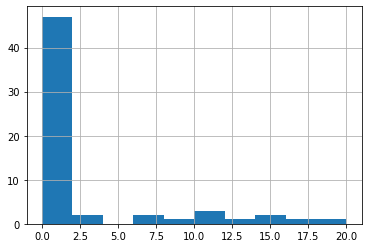

In [67]:
cluster_sample['mw'].hist()

In [68]:
cluster_sample.groupby('section').mean()['mw']

section
1     2.333333
41    2.166667
43    2.333333
46    1.833333
52    0.000000
59    0.000000
61    4.000000
82    5.500000
91    1.000000
99    3.333333
Name: mw, dtype: float64

In [69]:
def cluster_mean(N, M, df):
    """
    N: number of clusters in the population
    M: number of plots in the population
    df: DataFrame with cluster sample
    
    xbar = (N/ (n * M)) * Sum(Mh * xbarh)
    where n: number of clusters in sample
          Mh: number of plots in cluster h
          xbarh: mean from cluster h
    
    """
    
    sections = df['section'].unique()
    
    n = len(sections)
    
    means = []
    samples = []
    
    for section in sections:
        filt = df['section'] == section
        xbarh = df.loc[filt, 'mw'].mean()
        Mh = 211
        means.append(xbarh)
        samples.append(Mh)
    
    totals = np.multiply(means, samples)
    print(sum(totals))
    
    return (N / (n * M)) * sum(totals)

In [70]:
cluster_mean(100, 21100, cluster_sample)

4747.499999999999


2.2499999999999996

In [71]:
def cluster_total(N, df):
    """
    total for a cluster sample
    df: DataFrame with cluster sample
    N: number of clusters in the population
    
    tbar = N / n * Sum(Mh * xbarh)
    where n: number of clusters in the sample
        xbarh: the mean for the cluster
        mh: the number of plots sampled in cluster h  
    """
    
    sections = df['section'].unique()
    
    n = len(sections)
    
    means = []
    samples = []
    
    for section in sections:
        filt = df['section'] == section
        xbarh = df.loc[filt, 'mw'].mean()
        Mh = 211
        means.append(xbarh)
        samples.append(Mh)
    
    totals = np.multiply(means, samples)
    
    return (N / n) * totals.sum()
    

In [72]:
cluster_total(100, cluster_sample)

47474.99999999999

In [73]:
def cluster_variance(section, df):
    """
    df: DataFrame with cluster sample 
    
    s2h = Sum(xih - xbarh)^2 / (mh -1)
    where xih: the value of the ith element from cluster h
        xbarh: the mean for the cluster
        mh: the number of plots sampled in cluster h 
    """
    
    filt = df['section'] == section
    dff = df.loc[filt].copy()
    xbarh = dff['mw'].mean()
    mh = len(dff)
    dff['var'] = dff['mw'].apply(lambda x: (x - xbarh)**2)
    
    return dff['var'].sum() / (mh - 1)       
        

In [74]:
sections = cluster_sample['section'].unique()
for section in sections:
    print(np.sqrt(cluster_variance(section, cluster_sample)))

6.892024376045111
4.4907311951024935
0.0
8.164965809277259
0.0
6.324555320336759
4.400757510550504
4.802776974487434
2.449489742783178
5.715476066494082


In [75]:
def cluster_error(N, M, df):
    """
    computes standard error of a cluster sample
    df: DataFrame with cluster sample
    M: number of plots in the population
    N: number of clusters in the population
    
    SE = (1 / M) * sqrt((N^2 * (1 - n/N) / n) * Sum(Mh * xbarh - tbar/N)^2 /
        (n - 1) + (N / n) * Sum(((1 - mh/Mh) * Mh^2 * s2h / mh)))
    
    n: number of clusters in the sample
    Mh: number of plots in the population of cluster h
    mh: number of plots sampled in cluster h
    tbar: population total estimate (use cluster_total())
    s2h: estimate of cluster variance (use cluster_variance())
    
    """
    
    sections = df['section'].unique()
    
    n = len(sections)
    t = cluster_total(N, df)
    
    sum1s = []
    
    for section in sections:
        filt = df['section'] == section
        xbarh = df.loc[filt, 'mw'].mean()
        Mh = 211
        totalh = Mh * xbarh
        expected_total = t / N
        result = (totalh - expected_total)**2
        sum1s.append(result)
    
    sum1 = sum(sum1s)
    print(np.sqrt(sum1s))
    
    sum2s = []
    
    for section in sections:
        filt = df['section'] == section
        dff = df.loc[filt].copy()
        xbarh = dff['mw'].mean()
        Mh = 211
        mh = len(dff)
        s2h = cluster_variance(section, df)
        result = (1 - mh / Mh) * Mh**2 * s2h / mh
        sum2s.append(result)
    
    sum2 = sum(sum2s)
    print(np.sqrt(sum2s))
    
    section1 = 1 / M 
    section2 = N**2 * ( 1 - n/N ) / n   
    section3 = sum1 / (n - 1)
    section4 = (N / n) * sum2
    
    print(np.sqrt(section2 * section3))
    
    SE = section1 * np.sqrt(section2 * section3 + section4) 
    
    return SE
        
        

In [76]:
cluster_error(100, 21100, cluster_sample)

[685.75        87.91666667 474.75       228.58333333 474.75
 369.25        17.58333333  17.58333333 263.75        17.58333333]
[585.17981567 381.29366781   0.         693.2612142    0.
 536.99782743 373.65428912 407.78848003 207.97836426 485.28284994]
10898.830276175919


0.5551280872551939

In [80]:
cluster_error(100, 21100, cluster_sample) * 1.96

[685.75        87.91666667 474.75       228.58333333 474.75
 369.25        17.58333333  17.58333333 263.75        17.58333333]
[585.17981567 381.29366781   0.         693.2612142    0.
 536.99782743 373.65428912 407.78848003 207.97836426 485.28284994]
10898.830276175919


1.08805105102018

In [29]:
def cluster_error2(N, M, Mh, df):
    """
    computes standard error of a cluster sample
    df: DataFrame with cluster sample
    M: number of plots in the population
    N: number of clusters in the population
    
    SE = (1 / M) * sqrt((N^2 * (1 - n/N) / n) * Sum(Mh * xbarh - tbar/N)^2 /
        (n - 1) + (N / n) * Sum(((1 - mh/Mh) * Mh^2 * s2h / mh)))
    
    n: number of clusters in the sample
    Mh: number of plots in the population of cluster h
    mh: number of plots sampled in cluster h
    tbar: population total estimate (use cluster_total())
    s2h: estimate of cluster variance (use cluster_variance())
    
    """
    
    sections = df['section'].unique()
    
    n = len(sections)
    t = cluster_total(N, Mh, df)
    
    expected_total = t / N
    
    # calculate between-cluster variance
    dff1 = df.groupby('section').mean()
    dff1['total'] = dff1['mw'] * Mh
    dff1['out_var'] = dff1['total'].apply(lambda totalh: (totalh - expected_total)**2)
    
    print(np.sqrt(dff1['out_var']))
    
    out_var = dff1['out_var'].sum()
    
    # calculate within-cluster variance
    sum2s = []
    
    for section in sections:
        filt = df['section'] == section
        dff = df.loc[filt].copy()
        xbarh = dff['mw'].mean()
        mh = len(dff)
        s2h = cluster_variance(section, df)
        result = (1 - mh / Mh) * Mh**2 * s2h / mh
        sum2s.append(result)
    
    sum2 = sum(sum2s)
    print(np.sqrt(sum2s))
    
    section1 = 1 / M 
    section2 = N**2 * ( 1 - n/N ) / n   
    section3 = out_var / (n - 1)
    section4 = (N / n) * sum2
    
    print(np.sqrt(section2 * section3))
    
    SE = section1 * np.sqrt(section2 * section3 + section4) 
    
    return SE

In [78]:
def srs_error(N, df):
    """
    calculates standard error for a simple random sample
    df: DataFrame with simple random sample
    
    s2 = Sum(x - xbar)^2 / (n - 1)
    
    SE = sqrt((1 - n / N) * s2 / n)
    """
    
    n = len(df)
    
    dff = df.copy()
    xbar = dff['mw'].mean()
    
    dff['var'] = dff['mw'].apply(lambda x: (x - xbar)**2)
    
    s2 = np.sqrt(dff['var'].sum() / (len(dff) - 1))
    
    return np.sqrt((1 - n/N) * s2/n)
    

In [79]:
srs_error(21100, cluster_sample)

0.28640202961738215

In [32]:
df['var'] = df['mw'].apply(lambda x: )

4.722117944322325

In [33]:
def s2u(N, M, df):
    
    sums = []
    
    for section in sections:
        filt = df['section'] == section
        dff = df.loc[filt].copy()
        xbarh = dff['mw'].mean()
        Mh = 211
        mu = cluster_mean(N, M, dff)
        print(mu)
        n = 10
    
        sums.append((Mh * xbarh)**2)
    
    return sum(sums) / (n - 1)

In [34]:
s2b(100, 21100, cluster_sample)

NameError: name 's2b' is not defined

In [ ]:
def cluster_error2(df, n):
    
    sections = df['section'].unique()
    mu = cluster_mean(100, 21100, df)
    
    vars = []    
    
    for section in sections:
        filt = df['section'] == section
        dff = df.loc[filt].copy()
        xbarh = dff['mw'].mean()
        
        vars.append((xbarh - mu)**2)
        
    var_sum = sum(vars)
    
    return np.sqrt(var_sum/(n*(n-1)))
        
    
    

In [ ]:
cluster_error2(cluster_sample, 10)